In [2]:
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as pls
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
cancer = load_breast_cancer()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=0.3)
#test_size 기본값-학습 데이터:0.75, 테스트 데이터:0.25

In [6]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [8]:
print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(x_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(x_test, y_test)))

훈련 세트 정확도 : 0.93
테스트 세트 정확도 : 0.95


- 인공신경망의 데이터는 평균이 0, 분산 1이 되도록 변형해주는 것이 좋음
- 이 조건에 맞도록 데이터의 스케일을 조정해보자

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# 스케일러 불러오기
scaler = StandardScaler()
# 스케일러 학습
scaler.fit(x_train)
# 데이터스케일 변환
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# 학습, 변환 동시에 하는 방법
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [13]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [16]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.990
테스트 세트 정확도 : 0.971


In [17]:
mlp = MLPClassifier(random_state=0, max_iter=3000)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=3000, random_state=0)

In [18]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.977


In [19]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [20]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test))) #규제받아서 학습

훈련 세트 정확도 : 0.990
테스트 세트 정확도 : 0.971


In [22]:
import matplotlib.pyplot as plt

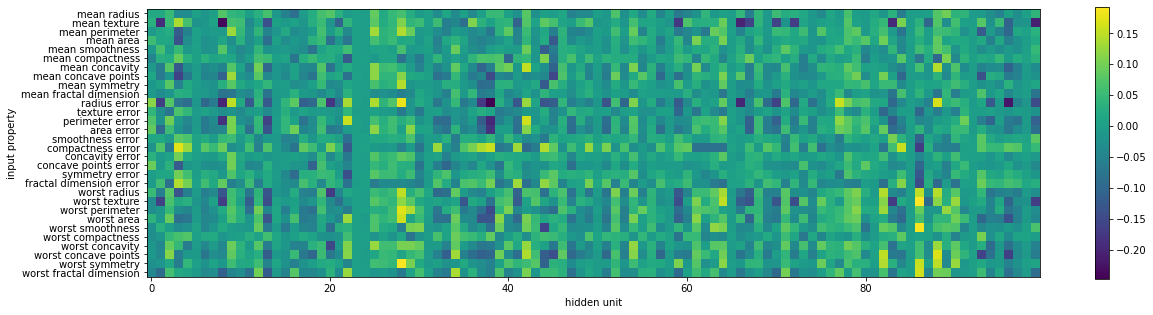

In [24]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input property')
plt.colorbar()

- 모델의 가중치를 확인해보면 어떤 특성이 학습되었는지 알 수 있음
- 입력층과 은닉층 사이에 위치한 학습된 가중치를 보여줌
- 지금 그래프는 행은 30개 입력특성(feature)는 100개의 은닉우닉에 해당함
- 이 그래프에서 밝은색은 높은 값, 어두운 색은 음수나 낮은값을 나타냄

- 어두운 색들 : 특성들은 덜 중요하거나 신경망에 적절하게 입력이 되지 않았을 수도 있다.